In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

In [3]:
df= pd.read_csv('StocksF6.csv',index_col= 'Date')
#df= pd.read_csv('StocksF7.csv',index_col= 'Date')

In [4]:
df.head()

,PBL.TO,BMO.TO,TSC.TO,MPC,BTE.TO,LWRK.TO
Date,,,,,,
7/4/2017,10.70,95.80,14.46,53.10,3.13,17.99
7/5/2017,11.31,95.74,13.92,52.90,2.90,18.07
7/6/2017,11.35,95.74,14.10,52.85,3.01,17.99
7/7/2017,11.49,95.85,14.49,54.07,2.91,18.21
7/10/2017,11.40,96.08,14.95,54.08,2.95,18.15


In [5]:
df.tail()

,PBL.TO,BMO.TO,TSC.TO,MPC,BTE.TO,LWRK.TO
Date,,,,,,
6/24/2022,22.15,123.16,36.50,87.29,6.08,30.97
6/27/2022,21.84,124.64,37.42,91.36,6.39,31.04
6/28/2022,21.76,124.68,35.51,89.06,6.80,30.73
6/29/2022,20.94,124.36,33.90,84.63,6.36,30.82
6/30/2022,20.17,123.78,33.49,85.68,6.25,30.88


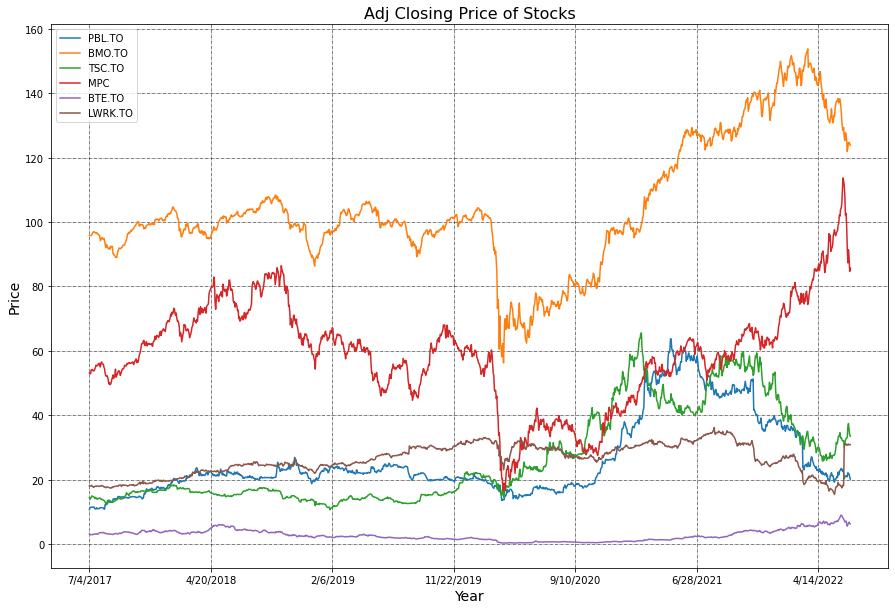

In [5]:
df.plot(figsize=(15, 10))
plt.title("Adj Closing Price of Stocks", fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [6]:

# Log of percentage change of all stocks in the list
Ret= df.pct_change().apply(lambda x: np.log(1+x))  # CONVERT TO RETURN
Ret.head()

,PBL.TO,BMO.TO,TSC.TO,MPC,BTE.TO,LWRK.TO
Date,,,,,,
7/4/2017,NaN,NaN,NaN,NaN,NaN,NaN
7/5/2017,0.055444,-0.000627,-0.038060,-0.003774,-0.076322,0.004437
7/6/2017,0.003530,0.000000,0.012848,-0.000946,0.037229,-0.004437
7/7/2017,0.012259,0.001148,0.027284,0.022822,-0.033787,0.012155
7/10/2017,-0.007864,0.002397,0.031253,0.000185,0.013652,-0.003300


<AxesSubplot:title={'center':'Stocks Daily returns'}, xlabel='Date'>

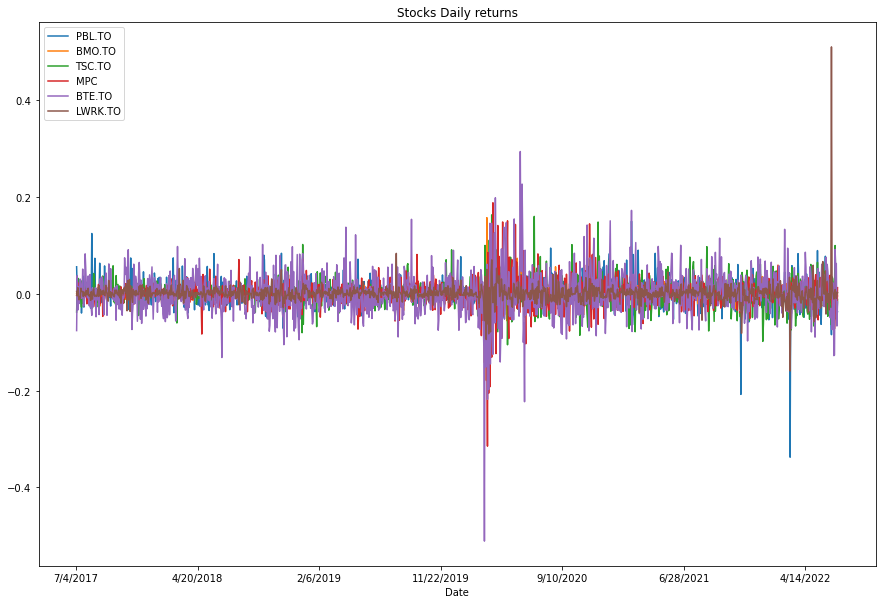

In [7]:
Ret.plot(title='Stocks Daily returns',figsize=(15,10))

## Calculating the Mean, standard deviation and other stats

In [8]:
Ann_Ret = Ret.mean()*252
print (Ann_Ret)

PBL.TO     0.127499
BMO.TO     0.051535
TSC.TO     0.168911
MPC        0.096223
BTE.TO     0.139082
LWRK.TO    0.108662
dtype: float64


In [9]:
Ann_Risk = Ret.std()*(252)**(0.5)
print(Ann_Risk)

PBL.TO     0.423682
BMO.TO     0.244357
TSC.TO     0.416386
MPC        0.472570
BTE.TO     0.735638
LWRK.TO    0.326641
dtype: float64


In [10]:
Ret_Risk = (Ann_Ret/Ann_Risk)
print(Ret_Risk)

PBL.TO     0.300931
BMO.TO     0.210900
TSC.TO     0.405658
MPC        0.203617
BTE.TO     0.189063
LWRK.TO    0.332666
dtype: float64


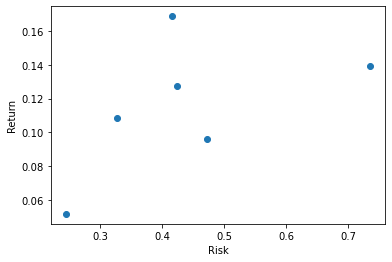

In [11]:
x=Ann_Risk
y=Ann_Ret
plt.ylabel('Return')
plt.xlabel('Risk')
plt.scatter(x,y)
plt.show()

## Calculating the Correlation and Covariance

In [12]:
Ret_Corr = Ret.corr()
print(Ret_Corr)

           PBL.TO    BMO.TO    TSC.TO       MPC    BTE.TO   LWRK.TO
PBL.TO   1.000000  0.247997  0.148425  0.069265  0.155093  0.158996
BMO.TO   0.247997  1.000000  0.193000  0.058845  0.462104  0.231469
TSC.TO   0.148425  0.193000  1.000000 -0.010873  0.149386  0.071545
MPC      0.069265  0.058845 -0.010873  1.000000  0.061215  0.022047
BTE.TO   0.155093  0.462104  0.149386  0.061215  1.000000  0.082253
LWRK.TO  0.158996  0.231469  0.071545  0.022047  0.082253  1.000000


<AxesSubplot:>

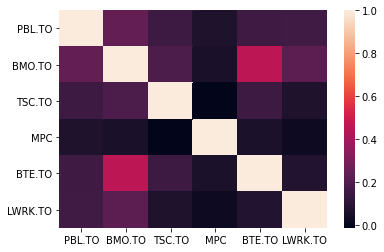

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(Ret_Corr)

In [14]:
Ret_Covar = Ret.cov()
print(Ret_Covar)

           PBL.TO    BMO.TO    TSC.TO       MPC    BTE.TO   LWRK.TO
PBL.TO   0.000712  0.000102  0.000104  0.000055  0.000192  0.000087
BMO.TO   0.000102  0.000237  0.000078  0.000027  0.000330  0.000073
TSC.TO   0.000104  0.000078  0.000688 -0.000008  0.000182  0.000039
MPC      0.000055  0.000027 -0.000008  0.000886  0.000084  0.000014
BTE.TO   0.000192  0.000330  0.000182  0.000084  0.002147  0.000078
LWRK.TO  0.000087  0.000073  0.000039  0.000014  0.000078  0.000423


In [15]:
#w = {'PBL.TO':0.143, 'BMO.TO':0.143, 'TCS.TO':0.143, 'MPC':0.143, 'BTE.TO':0.143, 'NVA.TO':0.143, 'LWRK.TO':0.143} 
#port_var = Ret_Covar.mul(w, axis=0).mul(w, axis=1).sum().sum()
#Ann_port_std = (port_var*252)**(0.5)
#print (port_var)
#print (port_var*252)

w = {'PBL.TO':0.167, 'BMO.TO':0.167, 'TCS.TO':0.167, 'MPC':0.167, 'BTE.TO':0.167, 'LWRK.TO':0.167} 
port_var = Ret_Covar.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_port_std = (port_var*252)**(0.5)
print (port_var)
print (port_var*252)

0.00018102853079724266
0.04561918976090515


In [16]:
Ann_port_std

0.213586492458922

In [17]:

# Portfolio returns
w = [0.167,0.167,0.167,0.167,0.167,0.167,]
#w = [0.143,0.143,0.143,0.143,0.143,0.143,0.143,]

port_er = (w*Ann_Ret).sum()
port_er

0.11554929741595012

In [18]:
# Volatility is given by the annual standard deviation. We multiply by 252 because there are 252 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
ann_sd

PBL.TO     0.423682
BMO.TO     0.244357
TSC.TO     0.416386
MPC        0.472570
BTE.TO     0.735638
LWRK.TO    0.326641
dtype: float64

In [19]:
assets = pd.concat([Ann_Ret,Ann_Risk,Ret_Risk], axis=1)
assets.columns = ['Ann Returns', 'Ann Risk', 'Ret per unit Risk']
assets

,Ann Returns,Ann Risk,Ret per unit Risk
PBL.TO,0.127499,0.423682,0.300931
BMO.TO,0.051535,0.244357,0.210900
TSC.TO,0.168911,0.416386,0.405658
MPC,0.096223,0.472570,0.203617
BTE.TO,0.139082,0.735638,0.189063
LWRK.TO,0.108662,0.326641,0.332666


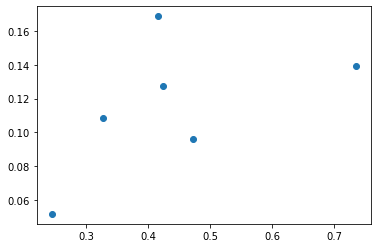

In [20]:
import matplotlib.pyplot as plt
x = Ann_Risk 
y = Ann_Ret
plt.scatter(x, y)
plt.show()

In [21]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 100000

In [22]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights,Ann_Ret) 
    p_ret.append(returns)
    var = Ret_Covar.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
    sd = np.sqrt(var) #Daily standard deviation
    ann_sd = sd*np.sqrt(252) #Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [23]:
data = {'Returns':p_ret, 'Risk':p_vol}
for counter, symbol in enumerate(df.columns.tolist()):
#print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Risk,PBL.TO weight,BMO.TO weight,TSC.TO weight,MPC weight,BTE.TO weight,LWRK.TO weight
0,0.122852,0.328874,0.163596,0.158908,0.160143,0.007436,0.349444,0.160474
1,0.111178,0.227144,0.170142,0.179217,0.130994,0.205376,0.138439,0.175833
2,0.090552,0.197030,0.087260,0.365760,0.040687,0.172699,0.027557,0.306037
3,0.118241,0.219720,0.070665,0.103363,0.268477,0.282492,0.049035,0.225968
4,0.109332,0.285753,0.061518,0.266311,0.117397,0.072159,0.281034,0.201582


<AxesSubplot:xlabel='Risk', ylabel='Returns'>

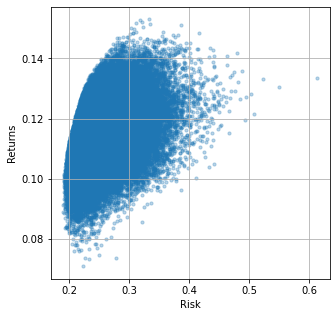

In [24]:
portfolios.plot.scatter(x='Risk', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[5,5])

In [25]:
min_vol_port = portfolios.iloc[portfolios['Risk'].idxmin()]
min_vol_port

Returns           0.089095
Risk              0.189699
PBL.TO weight     0.110470
BMO.TO weight     0.443709
TSC.TO weight     0.095966
MPC weight        0.167566
BTE.TO weight     0.000089
LWRK.TO weight    0.182201
Name: 81052, dtype: float64

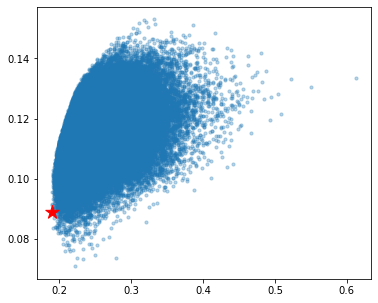

In [26]:
plt.subplots(figsize=[6,5])
plt.scatter(portfolios['Risk'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200)

In [27]:
# Finding the optimal portfolio
rf = 0.05 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Risk']).idxmax()]
optimal_risky_port

Returns           0.133119
Risk              0.230921
PBL.TO weight     0.200564
BMO.TO weight     0.009850
TSC.TO weight     0.352957
MPC weight        0.107602
BTE.TO weight     0.043242
LWRK.TO weight    0.285785
Name: 97219, dtype: float64

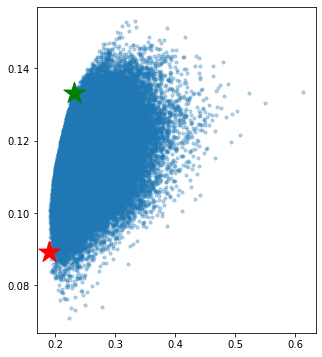

In [28]:
plt.subplots(figsize=(5, 6))
plt.scatter(portfolios['Risk'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [32]:
import numpy as np

In [35]:
Rf = 5 
Ret_Asset = np.array([14,8,20])
R=np.array([(9,3,15)])
Cov_A = np.array([(36,9,18),(9,9,18),(18,18,225)])

In [36]:
print (Ret_Asset)
print (R)
print ()
print (Cov_A)

[14  8 20]
[[ 9  3 15]]

[[ 36   9  18]
 [  9   9  18]
 [ 18  18 225]]


In [37]:
Inv_A = np.linalg.inv(Cov_A)

In [38]:
Inv_A

array([[ 3.70370370e-02, -3.70370370e-02, -8.67361738e-19],
       [-3.70370370e-02,  1.69312169e-01, -1.05820106e-02],
       [-0.00000000e+00, -1.05820106e-02,  5.29100529e-03]])

Lagrangian form, z

In [43]:
z = np.dot(R,Inv_A)

In [44]:
z

array([[0.22222222, 0.01587302, 0.04761905]])

In [45]:
z_sum = np.sum([z])

In [46]:
z_sum

0.2857142857142857

z/z_sum is the optimal weight of each security/asset in the portfolio.To determine the tangency portfolio asset weights, divide the individual z value of asset with the total z value. Divide each zi value in the row,with the z_sum vector

In [47]:
w_i = z/z_sum
print(w_i)

[[0.77777778 0.05555556 0.16666667]]


In [48]:
R.transpose()

array([[ 9],
       [ 3],
       [15]])

In [52]:
Ret_prt = np.dot((z/z_sum),R.transpose())

In [53]:
Ret_prt

array([[9.66666667]])

RETURN ON THE TANGENCY PORTFOLIO

In [54]:
Ret_portfolio = Ret_prt +Rf
print (Ret_portfolio)

[[14.66666667]]


CALCULATE THE RISK ON THE PORTFOLIO VAR = Wi X Cov X Wi Transpose

In [55]:
w_iT = w_i.transpose()
print (w_iT)

[[0.77777778]
 [0.05555556]
 [0.16666667]]


In [56]:
v = np.dot (w_i, Cov_A)
Var_port = np.dot(v,w_iT)

In [57]:
Var_port
Risk = np.sqrt (Var_port)
print (Var_port)
print (Risk)

[[33.83333333]]
[[5.81664279]]


SUMMARY OF Tangency Portfolio Weights, Return and risk

In [58]:
print (w_i)
print (Ret_portfolio)
print (Risk)

[[0.77777778 0.05555556 0.16666667]]
[[14.66666667]]
[[5.81664279]]


SHARPE RATIO OF PORTFOLIO Rp-Rf/Risk

In [59]:
Sharpe = Ret_prt/Risk
print (Sharpe)

[[1.66189794]]
